In [5]:
#load in modules
import pandas as pd
import urllib as ul
import numpy as np
import matplotlib.pyplot as plt
import sys
from Bio import Entrez

In [103]:
!pip install biopython

In [316]:
print(sys.version)
print(pd.show_versions())

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.6.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 19.6.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.0.0.post20200309
Cython           : 0.29.15
pytest           : 5.3.5
hypothesis       : 5.5.4
sphinx           : 2.4.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
fastparquet      : Non

In [22]:
#retrieve the gene_ids from the previous section (dop_geneids.txt)
sfari_gene = pd.read_csv('/Users/madisonvanhorn/Documents/Bioinformatics/SFARI-Gene_genes_10-29-2020release_12-03-2020export.csv')
#sfari_gene_ids.columns=['Gene Symbol']

sfari_gene.head()
#sfari_gene.describe()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


Score 1:  194
Score 2:  207
Score 3:  507


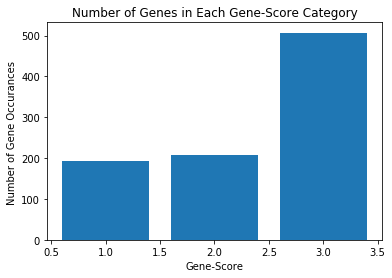

In [6]:
# Plot a bar chart of the number of genes in each SFARI gene-score category 
score_category = [1,2,3]
score1 = 0
score2 = 0
score3 = 0

for score in sfari_gene['gene-score']:

    if (score==1):
        score1 +=1
    if (score==2):
        score2 +=1
    if (score==3):
        score3 +=1
    else:
        continue
            
print('Score 1: ', score1)
print('Score 2: ', score2)
print('Score 3: ', score3)
y = [score1, score2, score3]

plt.title('Number of Genes in Each Gene-Score Category')
plt.xlabel('Gene-Score')
plt.ylabel('Number of Gene Occurances ')
plt.bar(score_category, y)
plt.savefig('/Users/madisonvanhorn/Documents/Bioinformatics/task1-part1.pdf')

In [7]:
# Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1

top_genes = sfari_gene.sort_values(by='gene-score')
top_genes = top_genes.sort_values(by='number-of-reports', ascending=False)

save_genes = top_genes.loc[top_genes['gene-score']==1]
save_genes = save_genes.iloc[:5]
gene_names = np.array(save_genes['gene-symbol'])
save_genes.loc[:, ['gene-score', 'gene-symbol', 'number-of-reports']].head()
# only save gene names

# print(save_genes)

,gene-score,gene-symbol,number-of-reports
783,1.0,SHANK3,88
570,1.0,NRXN1,88
496,1.0,MECP2,87
757,1.0,SCN2A,71
756,1.0,SCN1A,67


In [8]:
#how many Autism papers?
Entrez.email = "s2115429@ed.ac.uk" # You should replace this with your e-mail address 
gene_papers = {}
# simulating full NCBI search, not specifically pubmed, but we are extracting pubmed entires
for i in gene_names:
    num_papers = []

    #search 2
    handle = Entrez.egquery(term= '"' + i + '" AND Autism Spectrum Disorder[MAJR]"')
    record = Entrez.read(handle)
    handle.close()

    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print('Using just Autism w Mesh')
            print(row["Count"]+' papers\n')
            num_papers.append(row["Count"])

    gene_papers[i] = num_papers

print(gene_papers)

Using just Autism w Mesh
135 papers

Using just Autism w Mesh
46 papers

Using just Autism w Mesh
95 papers

Using just Autism w Mesh
29 papers

Using just Autism w Mesh
14 papers

{'SHANK3': ['135'], 'NRXN1': ['46'], 'MECP2': ['95'], 'SCN2A': ['29'], 'SCN1A': ['14']}


In [13]:
#how many Autism papers?
Entrez.email = "s2115429@ed.ac.uk" # You should replace this with your e-mail address 
gene_papers = {}
# simulating full NCBI search, not specifically pubmed, but we are extracting pubmed entires
for i in gene_names:
    num_papers = []

    #search 2
    handle = Entrez.egquery(term= '"' + i + '" AND Autism Spectrum Disorder[MH]"')
    record = Entrez.read(handle)
    handle.close()

    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print('Using just Autism w Mesh')
            print(row["Count"]+' papers\n')
            num_papers.append(row["Count"])

    gene_papers[i] = num_papers

print(gene_papers)

Using just Autism w Mesh
154 papers

Using just Autism w Mesh
63 papers

Using just Autism w Mesh
126 papers

Using just Autism w Mesh
34 papers

Using just Autism w Mesh
18 papers

{'SHANK3': ['154'], 'NRXN1': ['63'], 'MECP2': ['126'], 'SCN2A': ['34'], 'SCN1A': ['18']}


In [14]:
#how many Autism papers?
Entrez.email = "s2115429@ed.ac.uk" # You should replace this with your e-mail address 
gene_papers = {}

for i in gene_names:
    num_papers = []
    
    # mesh search is a good compromise because doesn't just look at phrase but looks at related phrases around that phrase
    #search 2
    handle = Entrez.egquery(term= '"' + i + '" AND Autism[MAJR]"')
    record = Entrez.read(handle)
    handle.close()

    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print('Using just Autism w Mesh')
            print(row["Count"]+' papers\n')
            num_papers.append(row["Count"])

    gene_papers[i] = num_papers

print(gene_papers)

Using just Autism w Mesh
65 papers

Using just Autism w Mesh
34 papers

Using just Autism w Mesh
75 papers

Using just Autism w Mesh
12 papers

Using just Autism w Mesh
11 papers

{'SHANK3': ['65'], 'NRXN1': ['34'], 'MECP2': ['75'], 'SCN2A': ['12'], 'SCN1A': ['11']}


In [ ]:
# Citation data




In [15]:
#how many Autism papers?
Entrez.email = "s2115429@ed.ac.uk" # You should replace this with your e-mail address 
gene_papers = {}

for i in gene_names:
    num_papers = []
    
    # mesh search is a good compromise because doesn't just look at phrase but looks at related phrases around that phrase
    #search 2
    handle = Entrez.egquery(term= '"' + i + '" AND Autism[MH]"')
    record = Entrez.read(handle)
    handle.close()

    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print('Using just Autism w Mesh')
            print(row["Count"]+' papers\n')
            num_papers.append(row["Count"])

    gene_papers[i] = num_papers

print(gene_papers)

Using just Autism w Mesh
79 papers

Using just Autism w Mesh
49 papers

Using just Autism w Mesh
98 papers

Using just Autism w Mesh
14 papers

Using just Autism w Mesh
12 papers

{'SHANK3': ['79'], 'NRXN1': ['49'], 'MECP2': ['98'], 'SCN2A': ['14'], 'SCN1A': ['12']}


In [10]:
gene_year = {}
each_gene = {}

# note the egquery function provides Entrez database counts from a global search.
for gene in gene_names:
    for i in range(2000,2021,1):
        print(i)
        print(gene)
        handle = Entrez.egquery(term= str(i) + '[dp] AND ' + gene + ' AND Autism[MAJR]"')
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                gene_year[i] = int(row["Count"])

    each_gene[gene] = dict(gene_year)

2000
SHANK3
2001
SHANK3
2002
SHANK3
2003
SHANK3
2004
SHANK3
2005
SHANK3
2006
SHANK3
2007
SHANK3
2008
SHANK3
2009
SHANK3
2010
SHANK3
2011
SHANK3
2012
SHANK3
2013
SHANK3
2014
SHANK3
2015
SHANK3
2016
SHANK3
2017
SHANK3
2018
SHANK3
2019
SHANK3
2020
SHANK3
2000
NRXN1
2001
NRXN1
2002
NRXN1
2003
NRXN1
2004
NRXN1
2005
NRXN1
2006
NRXN1
2007
NRXN1
2008
NRXN1
2009
NRXN1
2010
NRXN1
2011
NRXN1
2012
NRXN1
2013
NRXN1
2014
NRXN1
2015
NRXN1
2016
NRXN1
2017
NRXN1
2018
NRXN1
2019
NRXN1
2020
NRXN1
2000
MECP2
2001
MECP2
2002
MECP2
2003
MECP2
2004
MECP2
2005
MECP2
2006
MECP2
2007
MECP2
2008
MECP2
2009
MECP2
2010
MECP2
2011
MECP2
2012
MECP2
2013
MECP2
2014
MECP2
2015
MECP2
2016
MECP2
2017
MECP2
2018
MECP2
2019
MECP2
2020
MECP2
2000
SCN2A
2001
SCN2A
2002
SCN2A
2003
SCN2A
2004
SCN2A
2005
SCN2A
2006
SCN2A
2007
SCN2A
2008
SCN2A
2009
SCN2A
2010
SCN2A
2011
SCN2A
2012
SCN2A
2013
SCN2A
2014
SCN2A
2015
SCN2A
2016
SCN2A
2017
SCN2A
2018
SCN2A
2019
SCN2A
2020
SCN2A
2000
SCN1A
2001
SCN1A
2002
SCN1A
2003
SCN1A
2004
SCN1A


In [65]:

print("============================================================================")
gene_object = pd.DataFrame(each_gene).transpose()
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
gene_object




,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
SHANK3,0,0,0,0,0,0,1,3,6,8,2,9,5,5,2,5,7,6,8,5,3
NRXN1,0,0,0,0,0,0,0,2,3,5,0,2,5,5,5,3,1,3,1,4,0
MECP2,1,1,2,4,4,6,3,6,10,10,5,6,6,5,5,6,10,5,1,1,1
SCN2A,0,0,0,1,1,0,0,0,2,0,1,0,1,2,1,1,2,0,2,1,0
SCN1A,0,0,0,1,1,1,0,0,1,1,0,0,2,1,0,0,2,0,1,0,1


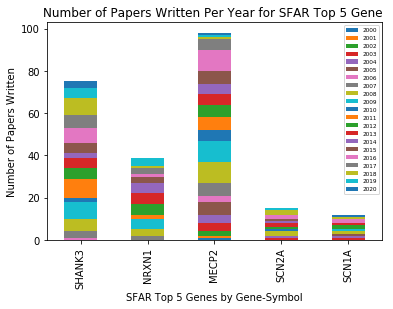

In [68]:
# Plot single stacked histogram

gene_object.plot.bar(stacked = True)
plt.title('Number of Papers Written Per Year for SFAR Top 5 Gene ')
plt.xlabel('SFAR Top 5 Genes by Gene-Symbol')
plt.ylabel('Number of Papers Written')
plt.legend(fontsize='xx-small')

# Extra - show all the tables

In [51]:
df = pd.DataFrame(columns=["Autism[MH]", "Autism Spectrum Disorder[MH]", "Autism[MAJR]", "Autism Spectrum Disorder[MAJR]"], index = ['SHANK3', 'NRXN1', 'MECP2', 'SCN2A', 'SCN1A'])
df["Autism[MH]"]=[79,49,98,14,12]
df["Autism Spectrum Disorder[MH]"]=[154,63,126,34,18]
df["Autism[MAJR]"]=[65,34, 75, 12, 11]
df["Autism Spectrum Disorder[MAJR]"]=[135,46,95,29,14]

df
#df.index = ['SHANK3', 'NRXN1', 'MECP2', 'SCN2A', 'SCN1A']

,Autism[MH],Autism Spectrum Disorder[MH],Autism[MAJR],Autism Spectrum Disorder[MAJR]
SHANK3,79,154,65,135
NRXN1,49,63,34,46
MECP2,98,126,75,95
SCN2A,14,34,12,29
SCN1A,12,18,11,14


# Part 2

In [344]:
# Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier)
#retrieve the gene_ids from the previous section (dop_geneids.txt)
# gene_ids = sfari_gene[['gene-symbol', 'gene-score']].copy()
# gene_ids.columns=['Symbol', 'GeneID']
# gene_ids.head()
# gene_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  992 non-null    object 
 1   GeneID  908 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.6+ KB


In [31]:
#retrieve the gene2go file
#ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz','gene2go.gz')

#gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')
#pull the human gene_info file directly from the NCBI server (once you have done this once you can comment the line out below by putting a # symbol in front of the line. This will stop you downloading it multiple times)

ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info.gz')
human_df = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')
#gene2go.head()
human_df.info()
human_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61741 entries, 0 to 61740
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   #tax_id                                61741 non-null  int64 
 1   GeneID                                 61741 non-null  int64 
 2   Symbol                                 61741 non-null  object
 3   LocusTag                               61741 non-null  object
 4   Synonyms                               61741 non-null  object
 5   dbXrefs                                61741 non-null  object
 6   chromosome                             61741 non-null  object
 7   map_location                           61741 non-null  object
 8   description                            61741 non-null  object
 9   type_of_gene                           61741 non-null  object
 10  Symbol_from_nomenclature_authority     61741 non-null  object
 11  Full_name_from_

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20201124,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20201206,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20201124,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20201124,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20201124,-


In [32]:
#now explicitly restrict to human (tax_id - 9606)
human_gene2go = gene2go[gene2go['#tax_id']==9606]
print(human_gene2go.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338896 entries, 636615 to 975510
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   #tax_id    338896 non-null  int64 
 1   GeneID     338896 non-null  int64 
 2   GO_ID      338896 non-null  object
 3   Evidence   338896 non-null  object
 4   Qualifier  338896 non-null  object
 5   GO_term    338896 non-null  object
 6   PubMed     338896 non-null  object
 7   Category   338896 non-null  object
dtypes: int64(2), object(6)
memory usage: 23.3+ MB
None


In [33]:
#merge the dataframes on the geneid
dop_gos = pd.merge(human_df,sfari_gene,right_on='gene-symbol',left_on='Symbol')
print('Length of new dataframe after merging the dataframes: ', len(dop_gos))
print("================================================================")
print('Details of merged dataframe: ', dop_gos.describe())
print("================================================================")
print('Summary of merged dataframe: ', dop_gos.info())
print("================================================================")

print(dop_gos.head())


print("================================================================")

# #the top scoring GO_ID in our list
# print('Top Scoring GO_ID')
# dop_go_counts = dop_gos.groupby('GO_ID').size().sort_values(ascending=False)
# print(dop_go_counts)
# print('\n')
print("================================================================")
# #find the top annotated GO term
# print('Find the top annotated GO term')
# top_goid = dop_gos.groupby('GO_ID').size().sort_values(ascending=False).index[0]
# print(top_goid)
print("================================================================")
# #create a unique lookup for GO_ID term descriptions
# print('Create a unique lookup for GO_ID term descriptions / drop duplicates')
# unique_dop_gos = dop_gos[['GO_ID','GO_term']].drop_duplicates()
# print(len(unique_dop_gos))
# print('Top GO_ID with description')
# #top GO_ID with it's description
# unique_dop_gos[unique_dop_gos['GO_ID'] == top_goid]
# print(unique_dop_gos)
# print(len(unique_dop_gos))
print("================================================================")

Length of new dataframe after merging the dataframes:  985
Details of merged dataframe:         #tax_id        GeneID  Modification_date  status  gene-score  \
count    985.0  9.850000e+02       9.850000e+02   985.0  901.000000   
mean    9606.0  2.484288e+05       2.020114e+07     9.0    2.342952   
std        0.0  4.525019e+06       3.188089e+02     0.0    0.810369   
min     9606.0  1.800000e+01       2.019121e+07     9.0    1.000000   
25%     9606.0  4.644000e+03       2.020112e+07     9.0    2.000000   
50%     9606.0  9.752000e+03       2.020112e+07     9.0    3.000000   
75%     9606.0  5.614300e+04       2.020121e+07     9.0    3.000000   
max     9606.0  1.008731e+08       2.020121e+07     9.0    3.000000   

        syndromic  number-of-reports  
count  985.000000         985.000000  
mean     0.127919           8.294416  
std      0.334169          10.428844  
min      0.000000           1.000000  
25%      0.000000           3.000000  
50%      0.000000           5.000000 

In [34]:
dop_gos.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome_x,map_location,description,type_of_gene,...,Feature_type,status,gene-symbol,gene-name,ensembl-id,chromosome_y,genetic-category,gene-score,syndromic,number-of-reports
0,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,...,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9606,43,ACHE,-,ACEE|ARACHE|N-ACHE|YT,MIM:100740|HGNC:HGNC:108|Ensembl:ENSG00000087085,7,7q22.1,acetylcholinesterase (Cartwright blood group),protein-coding,...,-,9,ACHE,Acetylcholinesterase (Yt blood group),ENSG00000087085,7,Rare Single Gene Mutation,2.0,0,5
2,9606,60,ACTB,-,BRWS1|PS1TP5BP1,MIM:102630|HGNC:HGNC:132|Ensembl:ENSG00000075624,7,7p22.1,actin beta,protein-coding,...,-,9,ACTB,actin beta,ENSG00000075624,7,"Rare Single Gene Mutation, Syndromic",NaN,1,3
3,9606,81,ACTN4,-,ACTININ-4|FSGS|FSGS1,MIM:604638|HGNC:HGNC:166|Ensembl:ENSG00000130402,19,19q13.2,actinin alpha 4,protein-coding,...,-,9,ACTN4,actinin alpha 4,ENSG00000130402,19,Rare Single Gene Mutation,3.0,0,4
4,9606,95,ACY1,-,ACY-1|ACY1D|HEL-S-5,MIM:104620|HGNC:HGNC:177|Ensembl:ENSG00000243989,3,3p21.2,aminoacylase 1,protein-coding,...,-,9,ACY1,aminoacylase 1,ENSG00000243989,3,"Rare Single Gene Mutation, Syndromic",NaN,1,9


In [35]:
dop_gos.shape

(985, 25)

In [36]:
human_gene2go.shape

(338896, 8)

In [72]:
human_gos = pd.merge(dop_gos,human_gene2go, right_on='GeneID',left_on='GeneID')
human_gos.head()
#human_gos.shape

,#tax_id_x,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome_x,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type,status,gene-symbol,gene-name,ensembl-id,chromosome_y,genetic-category,gene-score,syndromic,number-of-reports,#tax_id_y,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20201208,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,9606,GO:0001666,IEA,-,response to hypoxia,-,Process
1,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20201208,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
2,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20201208,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,9606,GO:0005739,IBA,-,mitochondrion,21873635,Component
3,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20201208,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,9606,GO:0005739,IDA,-,mitochondrion,-,Component
4,9606,18,ABAT,-,GABA-AT|GABAT|NPD009,MIM:137150|HGNC:HGNC:23|Ensembl:ENSG00000183044,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20201208,-,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5,9606,GO:0005739,ISS,-,mitochondrion,-,Component


In [38]:
uni = human_gos.Symbol
go_terms = {}

for i in uni:
    s = human_gos.loc[human_gos.Symbol == i]
    go_terms[i] = s['GO_term'].tolist()
    
print ('Success')

Success


In [69]:
human_go = human_gos[['Symbol', 'GO_term']]
human_go.head ()

,Symbol,GO_term
0,ABAT,response to hypoxia
1,ABAT,4-aminobutyrate transaminase activity
2,ABAT,mitochondrion
3,ABAT,mitochondrion
4,ABAT,mitochondrion


In [104]:
human_gos_count = human_gos.groupby('GO_ID').size().sort_values(ascending=False)
#human_gos.sort_values('GO_ID').head()
human_gos_count.head()
# GO_ID
# GO:0005515    679
# GO:0005886    484
# GO:0005634    450
# GO:0005829    415
# GO:0005654    377

GO_ID
GO:0005515    679
GO:0005886    484
GO:0005634    450
GO:0005829    415
GO:0005654    377
dtype: int64

In [360]:
top_gos = human_gos_count.index[0]
top_gos

'GO:0005515'

In [365]:
unique_human_gos = human_gos[['GO_ID', 'GO_term']].drop_duplicates ()
print(len(unique_human_gos))
unique_human_gos.head ()

6205


,GO_ID,GO_term
0,GO:0001666,response to hypoxia
1,GO:0003867,4-aminobutyrate transaminase activity
2,GO:0005739,mitochondrion
5,GO:0005759,mitochondrial matrix
6,GO:0007568,aging


In [362]:
# add a column for GO_ID Count
unique_human_gos[unique_human_gos['GO_ID'] == top_gos]

,GO_ID,GO_term
48,GO:0005515,protein binding


# Task 3

In [39]:
human_gos_gs_1 = human_gos.loc[human_gos['gene-score'] == 1]
human_gos_gs_1['GeneID'].unique().tolist()

[158,
 287,
 288,
 373,
 473,
 546,
 673,
 775,
 777,
 1106,
 1107,
 1175,
 1387,
 1499,
 1654,
 1717,
 1742,
 1760,
 1778,
 1788,
 1808,
 1826,
 1859,
 1995,
 2033,
 2290,
 2332,
 2334,
 2561,
 2562,
 2670,
 2770,
 2891,
 2904,
 3069,
 3097,
 3188,
 3192,
 3265,
 3745,
 3786,
 4076,
 4130,
 4204,
 4212,
 4297,
 4306,
 4763,
 4849,
 4929,
 5079,
 5253,
 5528,
 5536,
 5649,
 5718,
 5728,
 5754,
 5781,
 5991,
 6096,
 6304,
 6323,
 6326,
 6334,
 6497,
 6529,
 6601,
 6651,
 6660,
 6683,
 6734,
 6792,
 6812,
 6925,
 6934,
 6942,
 7010,
 7204,
 7248,
 7249,
 7337,
 7716,
 7812,
 7915,
 8216,
 8452,
 8573,
 8648,
 8666,
 8831,
 8861,
 9024,
 9320,
 9369,
 9378,
 9379,
 9631,
 9777,
 9778,
 9969,
 10295,
 10479,
 10522,
 10664,
 10716,
 10743,
 10765,
 10787,
 10847,
 11011,
 11151,
 22941,
 22999,
 23001,
 23036,
 23040,
 23096,
 23126,
 23135,
 23152,
 23181,
 23229,
 23389,
 23394,
 23469,
 23613,
 25836,
 25942,
 26040,
 26053,
 26058,
 26115,
 26137,
 26960,
 27086,
 27245,
 29072,
 29123

In [107]:
human_gos_gs_2 = human_gos.loc[human_gos['gene-score'] == 2]
human_gos_gs_2['GeneID'].unique ().tolist ()

[43,
 100,
 109,
 270,
 275,
 301,
 322,
 491,
 552,
 776,
 783,
 900,
 1012,
 1139,
 1268,
 1501,
 1523,
 1630,
 1740,
 1747,
 2109,
 2200,
 2239,
 2260,
 2475,
 2567,
 2890,
 2894,
 2898,
 2901,
 2902,
 2903,
 3150,
 3382,
 3608,
 3690,
 3720,
 3766,
 3785,
 3790,
 3912,
 4010,
 4035,
 4089,
 4233,
 4308,
 4628,
 4644,
 4650,
 4983,
 5021,
 5026,
 5053,
 5062,
 5071,
 5119,
 5245,
 5364,
 5444,
 5579,
 5625,
 5862,
 6092,
 6305,
 6335,
 6418,
 6473,
 6531,
 6597,
 6878,
 7014,
 7225,
 7403,
 7429,
 7874,
 7994,
 8128,
 8140,
 8242,
 8404,
 8562,
 8850,
 8853,
 8864,
 8912,
 8974,
 9037,
 9044,
 9229,
 9295,
 9344,
 9578,
 9603,
 9611,
 9662,
 9690,
 9820,
 9891,
 9928,
 9958,
 10055,
 10142,
 10237,
 10243,
 10518,
 10575,
 10771,
 11198,
 22866,
 22871,
 22981,
 22982,
 22986,
 23013,
 23019,
 23081,
 23112,
 23167,
 23191,
 23211,
 23236,
 23245,
 23259,
 23332,
 23426,
 25865,
 26047,
 26050,
 26290,
 26512,
 26523,
 26610,
 27071,
 27131,
 27185,
 27255,
 50944,
 51107,
 51366,
 

In [108]:
human_gos_gs_3 = human_gos.loc[human_gos['gene-score'] == 3]
human_gos_gs_3['GeneID'].unique ().tolist ()

[18,
 81,
 111,
 132,
 135,
 140,
 154,
 159,
 186,
 321,
 367,
 394,
 438,
 476,
 478,
 553,
 563,
 585,
 667,
 675,
 683,
 721,
 747,
 765,
 774,
 778,
 781,
 782,
 814,
 815,
 881,
 952,
 987,
 1006,
 1007,
 1008,
 1009,
 1105,
 1121,
 1131,
 1142,
 1183,
 1376,
 1454,
 1457,
 1524,
 1539,
 1584,
 1636,
 1644,
 1739,
 1746,
 1750,
 1762,
 1793,
 1803,
 1804,
 1806,
 1809,
 1812,
 1813,
 1814,
 1857,
 1960,
 1977,
 1981,
 1993,
 2020,
 2048,
 2055,
 2078,
 2100,
 2103,
 2131,
 2171,
 2195,
 2243,
 2259,
 2272,
 2315,
 2395,
 2444,
 2547,
 2557,
 2620,
 2739,
 2742,
 2778,
 2820,
 2861,
 2876,
 2895,
 2899,
 2900,
 2915,
 2917,
 2944,
 2969,
 2977,
 3105,
 3106,
 3115,
 3123,
 3135,
 3290,
 3351,
 3359,
 3479,
 3628,
 3708,
 3746,
 3751,
 3752,
 3772,
 3778,
 3800,
 3827,
 3949,
 3952,
 4036,
 4128,
 4129,
 4139,
 4152,
 4173,
 4175,
 4208,
 4335,
 4481,
 4488,
 4520,
 4524,
 4585,
 4622,
 4638,
 4643,
 4698,
 4756,
 4774,
 4781,
 4862,
 4897,
 4914,
 4916,
 5013,
 5020,
 5049,
 5054,

# Task 4



In [105]:
# Get top 10 GO_IDs
gos_one = human_gos_gs_1.groupby ('GO_ID').size().sort_values (ascending = False)
top_gos_one = gos_one[:10]

# Selecting all GO_ID's and GO_terms in this category
gos_one_test = human_gos_gs_1[['GO_ID', 'GO_term']].drop_duplicates ()

# Concatenating all GO_ID's and GO_terms for the top 10 GOs only, and selecting the table to start at 1 and finish at 10
one_table = pd.concat([(gos_one_test[gos_one_test['GO_ID'] == top_gos_one.index[i]]) for i in range(10)], ignore_index=True)
one_table.index = pd.RangeIndex(start=1, stop=11, step=1)

# Adding the final column to the table
one_table['GO_term_count'] = list(top_gos_one)
one_table

,GO_ID,GO_term,GO_term_count
1,GO:0005515,protein binding,150
2,GO:0005634,nucleus,142
3,GO:0005654,nucleoplasm,122
4,GO:0005886,plasma membrane,90
5,GO:0005829,cytosol,83
6,GO:0005737,cytoplasm,66
7,GO:0045944,positive regulation of transcription by RNA po...,57
8,GO:0000785,chromatin,50
9,GO:0006357,regulation of transcription by RNA polymerase II,47
10,GO:0000981,"DNA-binding transcription factor activity, RNA...",46


In [109]:
# SECOND TABLE

# Getting top GO_ID's and selecting top 10
gos_two = human_gos_gs_2.groupby ('GO_ID').size ().sort_values (ascending = False)
top_gos_two = gos_two[:10]

# Selecting all GO_ID's and GO_terms in this category
gos_two_test = human_gos_gs_2[['GO_ID', 'GO_term']].drop_duplicates ()

# Concatenating all GO_ID's and GO_terms for the top 10 GOs only, and selecting the table to start at 1 and finish at 10
two_table = pd.concat([(gos_two_test[gos_two_test['GO_ID'] == top_gos_two.index[i]]) for i in range(10)], ignore_index=True)
two_table.index = pd.RangeIndex(start=1, stop=11, step=1)

# Adding the final column to the table
two_table['GO_term_count'] = list(top_gos_two)
two_table

,GO_ID,GO_term,GO_term_count
1,GO:0005515,protein binding,136
2,GO:0005886,plasma membrane,117
3,GO:0005634,nucleus,97
4,GO:0005829,cytosol,93
5,GO:0005737,cytoplasm,75
6,GO:0005654,nucleoplasm,73
7,GO:0005887,integral component of plasma membrane,37
8,GO:0016020,membrane,34
9,GO:0016021,integral component of membrane,33
10,GO:0070062,extracellular exosome,28


In [110]:
# THIRD TABLE

# Getting top GO_ID's and selecting top 10
gos_three = human_gos_gs_3.groupby ('GO_ID').size ().sort_values (ascending = False)
top_gos_three = gos_three[:10]

# Selecting all GO_ID's and GO_terms in this category
gos_three_test = human_gos_gs_3[['GO_ID', 'GO_term']].drop_duplicates ()

# Concatenating all GO_ID's and GO_terms for the top 10 GOs only, and selecting the table to start at 1 and finish at 10
three_table = pd.concat([(gos_three_test[gos_three_test['GO_ID'] == top_gos_three.index[i]]) for i in range(10)], ignore_index=True)
three_table.index = pd.RangeIndex(start=1, stop=11, step=1)

# Adding the final column to the table
three_table['GO_term_count'] = list(top_gos_three)
three_table

,GO_ID,GO_term,GO_term_count
1,GO:0005515,protein binding,330
2,GO:0005886,plasma membrane,245
3,GO:0005829,cytosol,193
4,GO:0005634,nucleus,163
5,GO:0005737,cytoplasm,148
6,GO:0005654,nucleoplasm,141
7,GO:0005887,integral component of plasma membrane,95
8,GO:0016021,integral component of membrane,88
9,GO:0016020,membrane,75
10,GO:0046872,metal ion binding,67


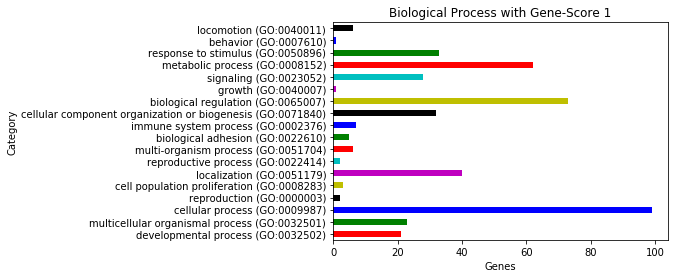

In [102]:
from matplotlib import pyplot as plt

x = pd.read_csv ('pantherChart1.tsv', sep = '\t')
x = x.set_index('Index')
x.plot.barh(x='Process', y = ['Behaviour'], legend = False, color = 'rgbkymc')
plt.xlabel('Genes')
plt.ylabel('Category')
plt.title('Biological Process with Gene-Score 1')
plt.show()

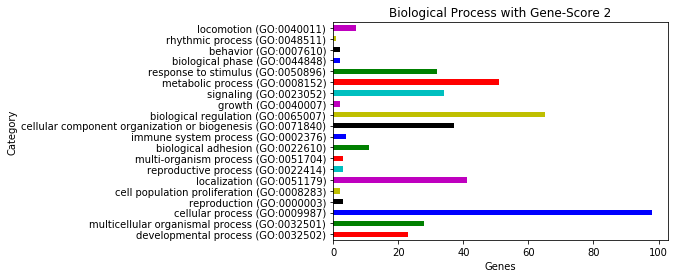

In [95]:
x = pd.read_csv ('pantherChart2.tsv', sep = '\t')
x = x.set_index('Index')

x.plot.barh(x='Process', y = ['Behaviour'], legend = False, color = 'rgbkymc')
plt.xlabel ('Genes')
plt.ylabel ('Category')
plt.title ('Biological Process with Gene-Score 2')
plt.show ()

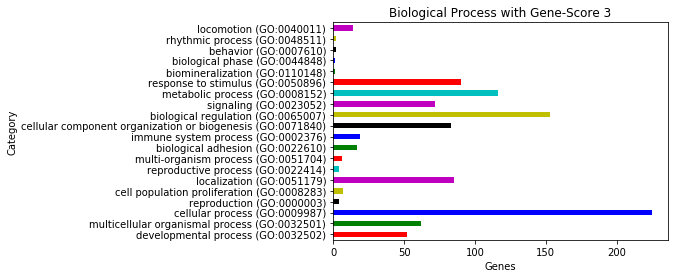

In [100]:
x = pd.read_csv ('pantherChart3.tsv', sep = '\t')
x = x.set_index('Index')

x.plot.barh(x='Process', y = ['Behaviour'], legend = False, color = 'rgbkymc')
plt.xlabel ('Genes')
plt.ylabel ('Category')
plt.title ('Biological Process with Gene-Score 3')
plt.show ()

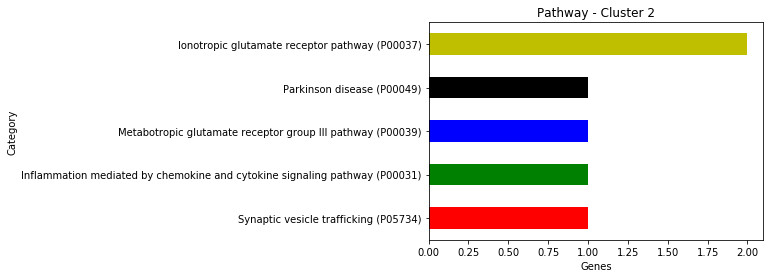

In [118]:
# x = pd.read_csv ('pantherChart - cluster 2.tsv', sep = '\t')
# x = x.set_index('Index')
# x.plot.barh(x='Process', y = ['Behaviour'], legend = False)
# plt.xlabel ('Genes')
# plt.ylabel ('Category')
# plt.title ('Pathway')
# plt.show ()


x = pd.read_csv('pantherChart_cluster2.tsv', sep = '\t')
x = x.set_index('Index')

x.plot.barh(x='Pathway', y = ['Pathway1'], legend = False, color = 'rgbkymc')
plt.xlabel('Genes')
plt.ylabel('Category')
plt.title('Pathway - Cluster 2')
plt.show()

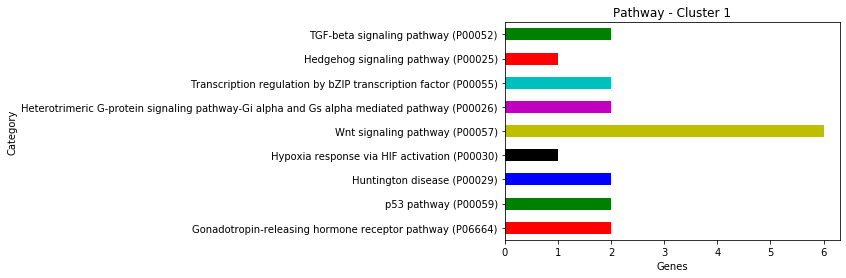

In [117]:

x = pd.read_csv('pantherChart_cluster1.tsv', sep = '\t')
x = x.set_index('Index')

x.plot.barh(x='Pathway', y = ['Pathway1'], legend = False, color = 'rgbkymc')
plt.xlabel('Genes')
plt.ylabel('Category')
plt.title('Pathway - Cluster 1')
plt.show()